In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
import os
import json

In [2]:
df = pd.read_csv('data/Lorde.tsv', sep='\t')
del df['Unnamed: 0']

## Remove Stopwords

In [3]:
def remove_stopwords(text):
    text = text.split(' ')
    text = [x for x in text if x not in stopwords.words('english')]
    return ' '.join(text)

In [4]:
df.loc[:, 'Corpus'] = df.loc[:, 'Corpus'].apply(lambda x: remove_stopwords(x))

## Remove Ponctuations

In [5]:
def remove_ponctuation(text):
    return  " ".join(re.findall("[a-zA-Z]+", text))

In [6]:
df.loc[:, 'Corpus'] = df.loc[:, 'Corpus'].apply(lambda x: remove_ponctuation(x))

## Remove Words with less than 3 chars

In [7]:
def remove_words_with_less_3(text):
    text = text.split(' ')
    text = [x for x in text if len(x)>3]
    return ' '.join(text)

In [8]:
df.loc[:, 'Corpus'] = df.loc[:, 'Corpus'].apply(lambda x: remove_words_with_less_3(x))

## Make all lowercase

In [9]:
df.loc[:, 'Corpus'] = df.loc[:, 'Corpus'].apply(lambda x: x.lower())

In [10]:
df['Word Count'] = df['Corpus'].apply(lambda x: len(x.split(' ')) )

## Word Count

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

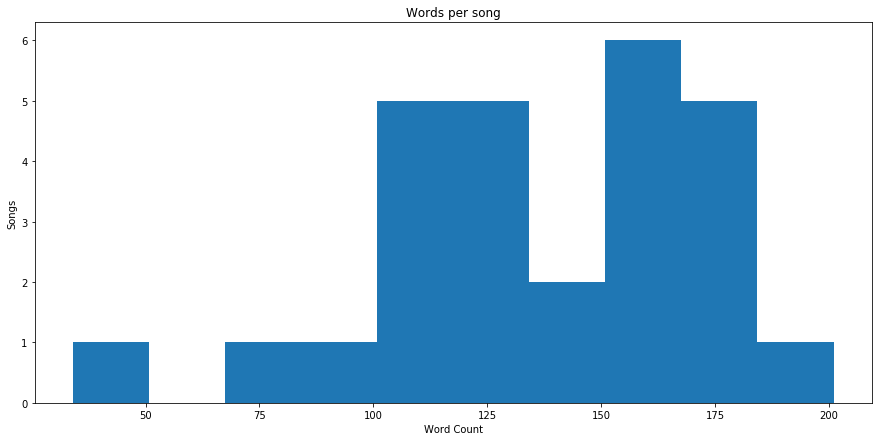

In [12]:
figure(figsize=(15,7))
(n, bins, patches) = plt.hist(df['Word Count'], 10)

plt.xlabel('Word Count')
plt.ylabel('Songs')
plt.title('Words per song')

plt.show()

## Most popular Words

In [13]:
popular_words = dict()

In [14]:
l = []
for row in df.iterrows():
    l += row[1]['Corpus'].split(' ')

In [15]:
for word in l:
    if word not in popular_words.keys():
        popular_words[word] = 1
    else:
        popular_words[word] += 1

In [18]:
popular_words_x = sorted(popular_words, key=popular_words.get,reverse=True)[:10][::-1]

In [19]:
popular_words_y = [popular_words.get(key) for key in sorted(popular_words, key=popular_words.get, reverse=True)[:10]][::-1]

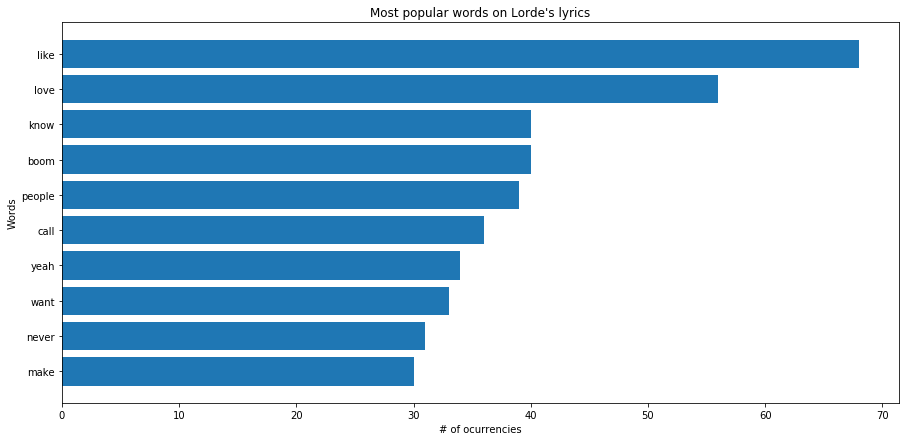

In [20]:
figure(figsize=(15,7))
plt.barh(popular_words_x, popular_words_y)

plt.title("Most popular words on Lorde's lyrics")
plt.xlabel('# of ocurrencies')
plt.ylabel('Words')


plt.show()

## Most Popular Words by album

In [21]:
popular_words_2017 = dict()
popular_words_2013 = dict()

In [22]:
l_2017 = []
for row in df[df['Ano'] == 2017].iterrows():
    l_2017 += row[1]['Corpus'].split(' ')
    
l_2013 = []
for row in df[df['Ano'] == 2013].iterrows():
    l_2013 += row[1]['Corpus'].split(' ')

In [23]:
for word in l_2017:
    if word not in popular_words_2017.keys():
        popular_words_2017[word] = 1
    else:
        popular_words_2017[word] += 1
        
for word in l_2013:
    if word not in popular_words_2013.keys():
        popular_words_2013[word] = 1
    else:
        popular_words_2013[word] += 1

In [24]:
popular_words_2017_x = sorted(popular_words_2017, key=popular_words_2017.get, reverse=True)[:10][::-1]
popular_words_2013_x = sorted(popular_words_2013, key=popular_words_2013.get, reverse=True)[:10][::-1]

In [25]:
popular_words_2017_y = [popular_words_2017.get(key) for key in sorted(popular_words_2017, key=popular_words_2017.get, reverse=True)[:10]][::-1]
popular_words_2013_y = [popular_words_2013.get(key) for key in sorted(popular_words_2013, key=popular_words_2013.get, reverse=True)[:10]][::-1]

Text(0, 0.5, 'Words')

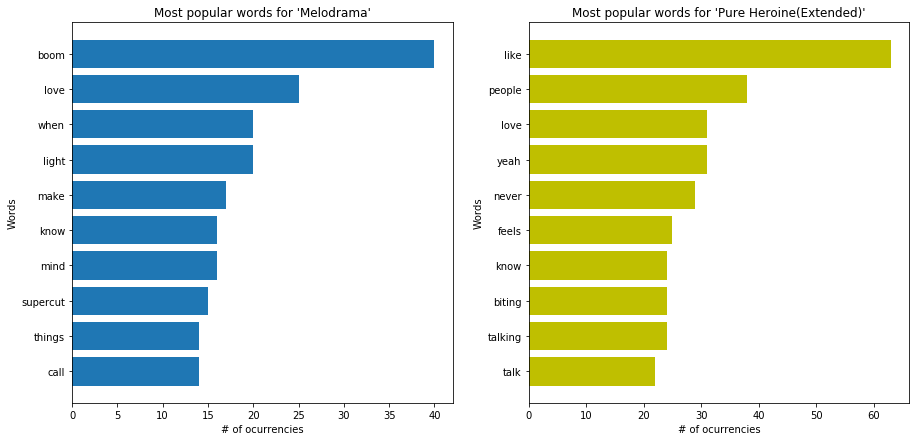

In [26]:
figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.barh(popular_words_2017_x, popular_words_2017_y)
plt.title("Most popular words for 'Melodrama'")
plt.xlabel('# of ocurrencies')
plt.ylabel('Words')

plt.subplot(1, 2, 2)
plt.barh(popular_words_2013_x, popular_words_2013_y, color='y')
plt.title("Most popular words for 'Pure Heroine(Extended)'")
plt.xlabel('# of ocurrencies')
plt.ylabel('Words')




## TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [28]:
doc_Melodrama =  []
for row in df[df['Ano'] == 2017].iterrows():
    doc_Melodrama += row[1]['Corpus'].split(' ')
    

doc_PureHeroine =  []
for row in df[df['Ano'] == 2013].iterrows():
    doc_PureHeroine += row[1]['Corpus'].split(' ')

In [29]:
doc_Melodrama = ' '.join(doc_Melodrama)

doc_PureHeroine = ' '.join(doc_PureHeroine)

In [30]:
tfidf = TfidfVectorizer()
response = tfidf.fit_transform([doc_Melodrama, doc_PureHeroine])

In [31]:
scores = zip(tfidf.get_feature_names(), np.asarray(response.sum(axis=0)).ravel())

sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

In [32]:
sorted_scores[:10]

[('boom', 0.45024092715119174),
 ('like', 0.4165595162949872),
 ('love', 0.3854884848546186),
 ('know', 0.2715746227081549),
 ('call', 0.24360423535069303),
 ('people', 0.23511349147785682),
 ('want', 0.22567491390752065),
 ('make', 0.21384253061419645),
 ('feels', 0.2099919641702857),
 ('yeah', 0.20929591450580165)]

## TF-IDF Álbum

In [33]:
doc_Melodrama = df[df['Ano'] == 2017].loc[:, 'Corpus'].to_list()
response = tfidf.fit_transform([doc for doc in doc_Melodrama])
scores = zip(tfidf.get_feature_names(), np.asarray(response.sum(axis=0)).ravel())
sorted_scores_Melodrama = sorted(scores, key=lambda x: x[1], reverse=True)

In [34]:
doc_PureHeroine = df[df['Ano'] == 2013].loc[:, 'Corpus'].to_list()
response = tfidf.fit_transform([doc for doc in doc_PureHeroine])
scores = zip(tfidf.get_feature_names(), np.asarray(response.sum(axis=0)).ravel())
sorted_scores_PureHeorine = sorted(scores, key=lambda x: x[1], reverse=True)


Text(0, 0.5, 'Words')

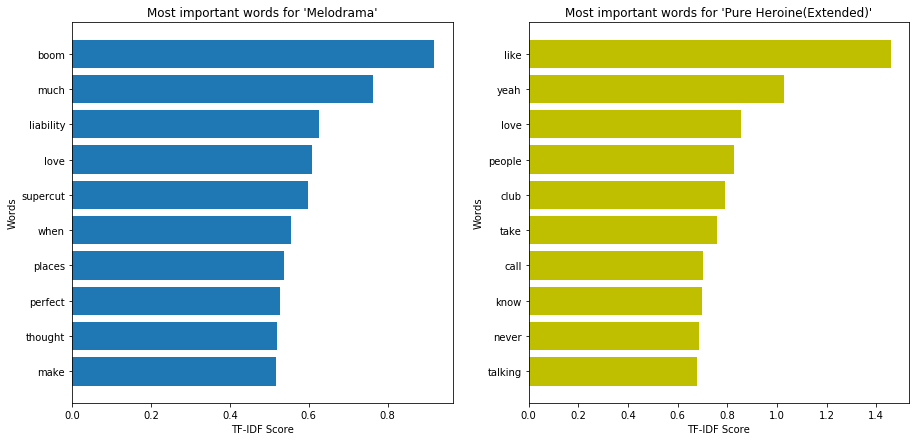

In [35]:
figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.barh([x[0] for x in sorted_scores_Melodrama[:10]][::-1], [x[1] for x in sorted_scores_Melodrama[:10]][::-1])
plt.title("Most important words for 'Melodrama'")
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')

plt.subplot(1, 2, 2)
plt.barh([x[0] for x in sorted_scores_PureHeorine[:10]][::-1], [x[1] for x in sorted_scores_PureHeorine[:10]][::-1], color='y')
plt.title("Most important words for 'Pure Heroine(Extended)'")
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')

## NRC

In [37]:
df_nrc = pd.read_csv('data/NRC.tsv', sep='\t',  names=['Sentiment', 'Filter', 'Score'])

In [38]:
set_of_nrc_words = df_nrc.loc[:, 'Sentiment'].unique()

set_of_nrc_words_Melodrama = set()
set_of_nrc_words_PureHeroine = set()

for word in ' '.join(doc_Melodrama).split(' '):
    if word in set_of_nrc_words:
        set_of_nrc_words_Melodrama.add(word)
        
        
for word in ' '.join(doc_PureHeroine).split(' '):
    if word in set_of_nrc_words:
        set_of_nrc_words_PureHeroine.add(word)


In [39]:
nrc_score_Melodrama = df_nrc[(df_nrc['Sentiment'].isin(set_of_nrc_words_Melodrama)) & (df_nrc['Score'] == 1)].groupby(['Filter']).sum()
nrc_score_Melodrama = nrc_score_Melodrama.sort_values(by='Score', ascending=False).iloc[2:, :]

In [40]:
nrc_score_PureHeroine = df_nrc[(df_nrc['Sentiment'].isin(set_of_nrc_words_PureHeroine)) & (df_nrc['Score'] == 1)].groupby(['Filter']).sum()
nrc_score_PureHeroine = nrc_score_PureHeroine.sort_values(by='Score', ascending=False).iloc[2:, :]

Text(0, 0.5, 'Words')

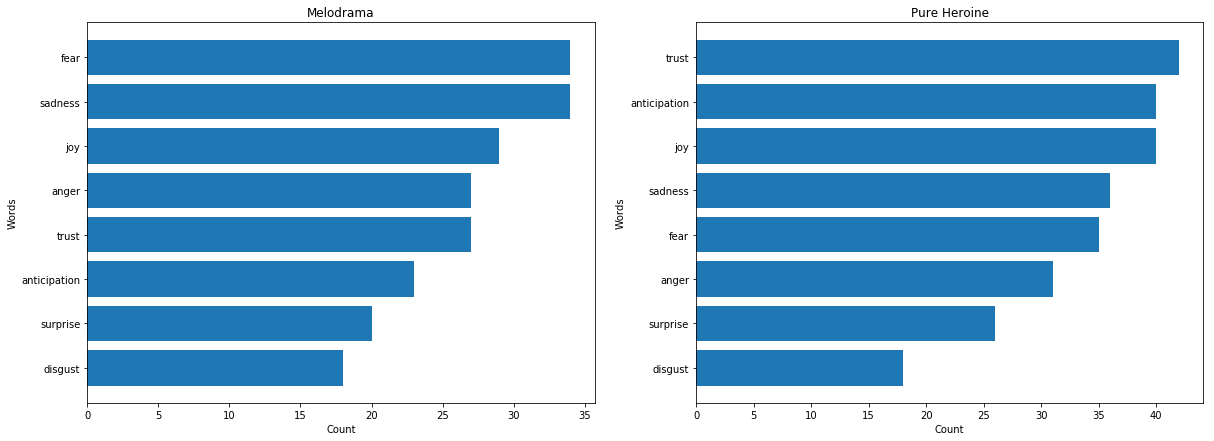

In [41]:
figure(figsize=(20,7))

plt.subplot(1, 2, 1)
plt.barh(nrc_score_Melodrama.index[::-1], [value[0] for value in nrc_score_Melodrama.values][::-1])
plt.title("Melodrama")
plt.xlabel('Count')
plt.ylabel('Words')


plt.subplot(1, 2, 2)
plt.barh(nrc_score_PureHeroine.index[::-1], [value[0] for value in nrc_score_PureHeroine.values][::-1])
plt.title("Pure Heroine")
plt.xlabel('Count')
plt.ylabel('Words')

In [42]:
nrc_score_PureHeroine.index, [value[0] for value in nrc_score_PureHeroine.values]

(Index(['trust', 'anticipation', 'joy', 'sadness', 'fear', 'anger', 'surprise',
        'disgust'],
       dtype='object', name='Filter'), [42, 40, 40, 36, 35, 31, 26, 18])

## NRC for Positive/Negative

In [43]:
words_for_positive_sentiments_Melodrama = df_nrc[\
       (df_nrc['Sentiment'].isin(set_of_nrc_words_Melodrama)) & \
       (df_nrc['Score'] == 1) & \
       (df_nrc['Filter'] == 'positive')].loc[:, 'Sentiment'].values

words_for_negative_sentiments_Melodrama = df_nrc[\
       (df_nrc['Sentiment'].isin(set_of_nrc_words_Melodrama)) & \
       (df_nrc['Score'] == 1) & \
       (df_nrc['Filter'] == 'negative')].loc[:, 'Sentiment'].values

words_for_positive_sentiments_PureHeroine = df_nrc[\
       (df_nrc['Sentiment'].isin(set_of_nrc_words_PureHeroine)) & \
       (df_nrc['Score'] == 1) & \
       (df_nrc['Filter'] == 'positive')].loc[:, 'Sentiment'].values

words_for_negative_sentiments_PureHeroine = df_nrc[\
       (df_nrc['Sentiment'].isin(set_of_nrc_words_PureHeroine)) & \
       (df_nrc['Score'] == 1) & \
       (df_nrc['Filter'] == 'negative')].loc[:, 'Sentiment'].values

In [44]:
positive_count_Melodrama = dict()
negative_count_Melodrama = dict()

positive_count_PureHeroine = dict()
negative_count_PureHeroine = dict()

In [45]:
for word in ' '.join(doc_Melodrama).split(' '):
    if word in words_for_positive_sentiments_Melodrama:
        if word in positive_count_Melodrama.keys():
            positive_count_Melodrama[word]+=1
        else:
            positive_count_Melodrama[word] = 1
            
for word in ' '.join(doc_Melodrama).split(' '):
    if word in words_for_negative_sentiments_Melodrama:
        if word in negative_count_Melodrama.keys():
            negative_count_Melodrama[word]+=1
        else:
            negative_count_Melodrama[word] = 1
            
            
for word in ' '.join(doc_PureHeroine).split(' '):
    if word in words_for_positive_sentiments_PureHeroine:
        if word in positive_count_PureHeroine.keys():
            positive_count_PureHeroine[word]+=1
        else:
            positive_count_PureHeroine[word] = 1
            
for word in ' '.join(doc_PureHeroine).split(' '):
    if word in words_for_negative_sentiments_PureHeroine:
        if word in negative_count_PureHeroine.keys():
            negative_count_PureHeroine[word]+=1
        else:
            negative_count_PureHeroine[word] = 1

In [46]:
positive_x_Melodrama = sorted(positive_count_Melodrama, key=positive_count_Melodrama.get, reverse=True)[:10]
positive_y_Melodrama = [positive_count_Melodrama.get(key) for key in sorted(positive_count_Melodrama, key=positive_count_Melodrama.get, reverse=True)][:10]

negative_x_Melodrama = sorted(negative_count_Melodrama, key=negative_count_Melodrama.get, reverse=True)[:10]
negative_y_Melodrama = [negative_count_Melodrama.get(key) for key in sorted(negative_count_Melodrama, key=negative_count_Melodrama.get, reverse=True)][:10]


positive_x_PureHeroine = sorted(positive_count_PureHeroine, key=positive_count_PureHeroine.get, reverse=True)[:10]
positive_y_PureHeroine = [positive_count_PureHeroine.get(key) for key in sorted(positive_count_PureHeroine, key=positive_count_PureHeroine.get, reverse=True)][:10]

negative_x_PureHeroine = sorted(negative_count_PureHeroine, key=negative_count_PureHeroine.get, reverse=True)[:10]
negative_y_PureHeroine = [negative_count_PureHeroine.get(key) for key in sorted(negative_count_PureHeroine, key=negative_count_PureHeroine.get, reverse=True)][:10]

Text(0, 0.5, 'Words')

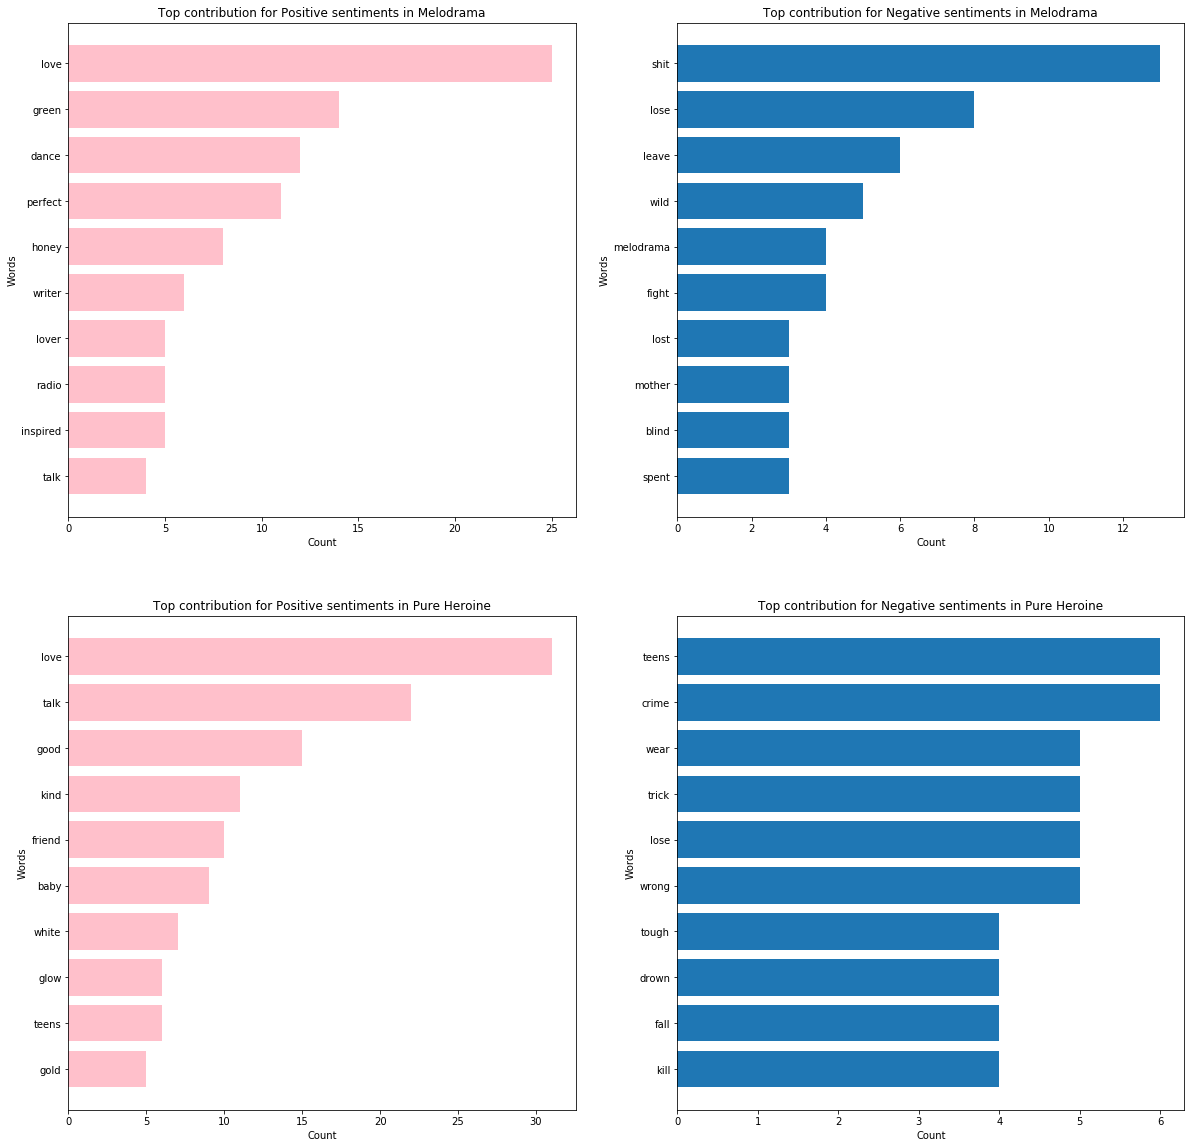

In [47]:
figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.barh(positive_x_Melodrama[::-1], positive_y_Melodrama[::-1], color='pink')
plt.title("Top contribution for Positive sentiments in Melodrama")
plt.xlabel('Count')
plt.ylabel('Words')


plt.subplot(2, 2, 2)
plt.barh(negative_x_Melodrama[::-1], negative_y_Melodrama[::-1])
plt.title("Top contribution for Negative sentiments in Melodrama")
plt.xlabel('Count')
plt.ylabel('Words')


plt.subplot(2, 2, 3)
plt.barh(positive_x_PureHeroine[::-1], positive_y_PureHeroine[::-1], color='pink')
plt.title("Top contribution for Positive sentiments in Pure Heroine")
plt.xlabel('Count')
plt.ylabel('Words')


plt.subplot(2, 2, 4)
plt.barh(negative_x_PureHeroine[::-1], negative_y_PureHeroine[::-1])
plt.title("Top contribution for Negative sentiments in Pure Heroine")
plt.xlabel('Count')
plt.ylabel('Words')